In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

Today we are going to observe if we can teach AI to distinguish between "delicious" and "disgusting".

Here is the reference blog: https://towardsdatascience.com/classifying-cats-vs-dogs-a-beginners-guide-to-deep-learning-4469ffed086c

In [4]:
!pip install -q jmd_imagescraper

In [5]:
!pip install -Uqq fastbook

import fastbook  #import the fast.ai library
from fastbook import *  #dont't worry, it's designed to work with import *
fastbook.setup_book()
from fastai.vision.widgets import *

#import the image scraper by @JoeDockrill, website: https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *


In [6]:
food=['delicious','disgusting']
path = Path().cwd()/"food"#assigns path to current working directory

In [7]:
duckduckgo_search(path,"delicious","delicious",max_results=100) #downloads 100 images of 'delicious food' and saves it in path/delicious

Duckduckgo search: delicious


[Path('/content/food/delicious/001_8ed6d051.jpg'),
 Path('/content/food/delicious/002_454e5483.jpg'),
 Path('/content/food/delicious/003_a5edd4c1.jpg'),
 Path('/content/food/delicious/004_21f0ce95.jpg'),
 Path('/content/food/delicious/005_ebe2760f.jpg'),
 Path('/content/food/delicious/006_4dcc0679.jpg'),
 Path('/content/food/delicious/007_4f30370d.jpg'),
 Path('/content/food/delicious/008_e2cf9790.jpg'),
 Path('/content/food/delicious/009_866c9624.jpg'),
 Path('/content/food/delicious/010_0bb76e56.jpg'),
 Path('/content/food/delicious/011_1c3708ed.jpg'),
 Path('/content/food/delicious/012_1257ea64.jpg'),
 Path('/content/food/delicious/013_61da6a67.jpg'),
 Path('/content/food/delicious/014_e0a2817e.jpg'),
 Path('/content/food/delicious/015_cc844fad.jpg'),
 Path('/content/food/delicious/016_184351d1.jpg'),
 Path('/content/food/delicious/017_23ee603d.jpg'),
 Path('/content/food/delicious/018_c2d33cd4.jpg'),
 Path('/content/food/delicious/019_ba1e29bb.jpg'),
 Path('/content/food/delicious/

In [8]:
duckduckgo_search(path,"disgusting","disgusting",max_results=100)#downloads 100 images of 'disgusting' and saves it in path/disgusting


Duckduckgo search: disgusting


[Path('/content/food/disgusting/001_4cbe0e67.jpg'),
 Path('/content/food/disgusting/002_14a65a46.jpg'),
 Path('/content/food/disgusting/003_c5effcec.jpg'),
 Path('/content/food/disgusting/004_edd3c945.jpg'),
 Path('/content/food/disgusting/005_016642c1.jpg'),
 Path('/content/food/disgusting/006_0eeac624.jpg'),
 Path('/content/food/disgusting/007_e003a5d7.jpg'),
 Path('/content/food/disgusting/008_fcf68c96.jpg'),
 Path('/content/food/disgusting/009_2b1670c6.jpg'),
 Path('/content/food/disgusting/010_45580122.jpg'),
 Path('/content/food/disgusting/011_14f420f4.jpg'),
 Path('/content/food/disgusting/012_87237fbf.jpg'),
 Path('/content/food/disgusting/013_574ef8b2.jpg'),
 Path('/content/food/disgusting/014_87723321.jpg'),
 Path('/content/food/disgusting/015_c9230bb4.jpg'),
 Path('/content/food/disgusting/016_bd555e29.jpg'),
 Path('/content/food/disgusting/017_ce551fe2.jpg'),
 Path('/content/food/disgusting/018_f52bb0b5.jpg'),
 Path('/content/food/disgusting/019_b36b879a.jpg'),
 Path('/cont

In [9]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [10]:
fns=get_image_files(path)
fns

(#200) [Path('/content/food/disgusting/014_87723321.jpg'),Path('/content/food/disgusting/083_b8d44e3d.jpg'),Path('/content/food/disgusting/024_157da47a.jpg'),Path('/content/food/disgusting/008_fcf68c96.jpg'),Path('/content/food/disgusting/015_c9230bb4.jpg'),Path('/content/food/disgusting/053_c20d0d9a.jpg'),Path('/content/food/disgusting/004_edd3c945.jpg'),Path('/content/food/disgusting/012_87237fbf.jpg'),Path('/content/food/disgusting/017_ce551fe2.jpg'),Path('/content/food/disgusting/043_462f41db.jpg')...]

In [11]:
failed=verify_images(fns)#looks for files that arent images
failed

(#0) []

In [12]:
failed.map(Path.unlink);#unlinks the failed files from the folder


In [13]:
food=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),#splits the dataset into a training set and validation set
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [14]:
dls=food.dataloaders(path)

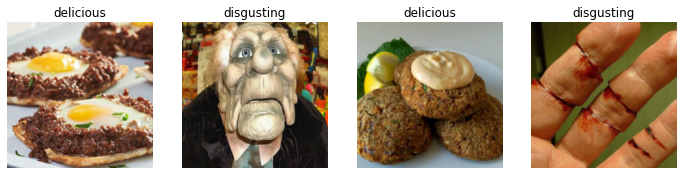

In [15]:
dls.valid.show_batch(max_n=4,nrows=1)

In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)#training our model
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.324312,3.640504,0.475000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.732475,2.595446,0.475000,00:03
1,0.585272,2.096478,0.400000,00:02
2,0.523783,1.683124,0.275000,00:01
3,0.432807,1.404438,0.225000,00:01


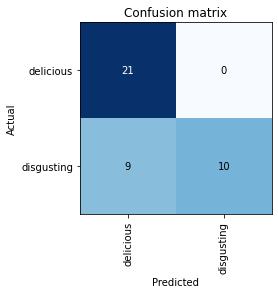

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()#plots a confusion matrix

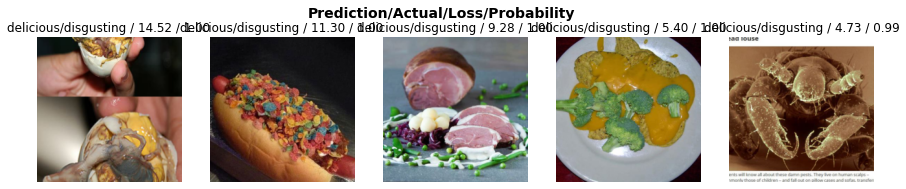

In [18]:
interp.plot_top_losses(5, nrows=1)


In [38]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')

btn_upload = widgets.FileUpload()#Displays a widget which can be used to upload images from your system
btn_upload

FileUpload(value={}, description='Upload')

In [39]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))#resizes the uloaded image
out_pl


Output()

In [40]:
pred,pred_idx,probs = learn_inf.predict(img)#asks the model to predict the animal in the image!
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred 

Label(value='Prediction: delicious; Probability: 0.9998')